## Plotting and visualization



-   One of the most important tasks in data analysis
-   Could be an exploratory process or deploying an interactive tool
-   `matplotlib` is the oldest and primary package
-   Additional packages have been developed for data visualization

![img](images/pyvis.png)



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Matplotlib basics



At its simplest



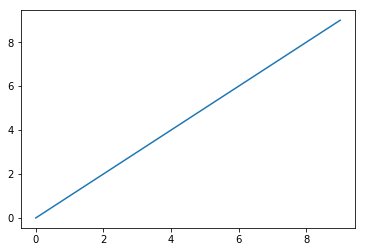

In [2]:
data = np.arange(10)
plt.plot(data)

## Figures and subplots



`Figure` object contains `matplotlib` plots. We can create a new figure and then add subplots



<IPython.core.display.Javascript object>


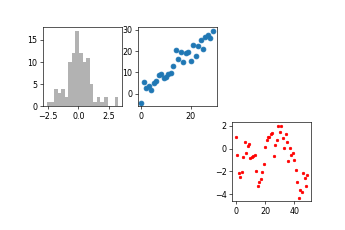

In [15]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,6)

When we use a plotting command, `matplotlib` draws on the last figure used



In [17]:
plt.plot(np.random.randn(50).cumsum(), 'r.')

Now let's be explicit with where we want to draw our plots



In [16]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

There is a shortcut to create a new figure and subplots



<IPython.core.display.Javascript object>


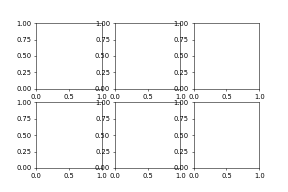

In [21]:
fig, axes = plt.subplots(2, 3)
axes[0][1]

****Plot the cumulative sum of a 30-element random vector and change markers and line attributes (color, width, type)****



<IPython.core.display.Javascript object>


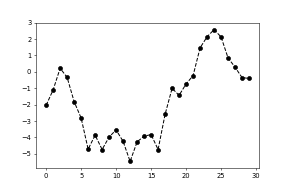

In [22]:
plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'ko--')

****Now plot multiple cumulative sums on the same plot and then****

-   Change the limits of the x-axis to [-10, 40]
-   Add a legend in the top left corner
-   Change the limits of the x-axis back to [0,30] and set ticks to A, B, C at positions 5, 15, and 25
-   Add a title to your plot
-   Rotate your x-axis labels by 90 degrees
-   Change the font size of the y-axis labels

Look at `legend`, `set_xticklabels`, `set_xticks`, `title`, `set_xlabel` etc.



<IPython.core.display.Javascript object>


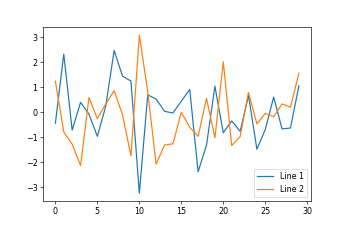

In [39]:
fig = plt.figure()
plt.plot(np.random.randn(30))
plt.plot(np.random.randn(30))
ax = plt.gca()
ax.get_xticks()
plt.legend(('Line 1', 'Line 2'), loc=4)

## seaborn and pandas



Importing the `seaborn` library simplifies the creation of many common visualizations and also improves plot aesthetics



<IPython.core.display.Javascript object>


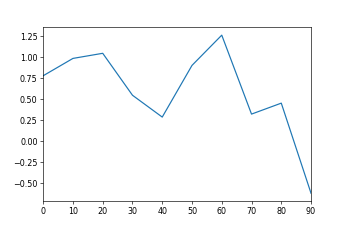

In [40]:
import seaborn as sns
plt.figure()
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Now let's change the plot style and plot a DataFrame



<IPython.core.display.Javascript object>


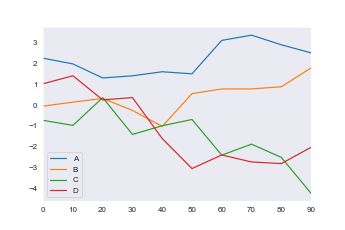

In [41]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
sns.set_style("dark")
df.plot()

## Bar plots



In [42]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.269631
b    0.549967
c    0.072382
d    0.355470
e    0.174367
f    0.411144
g    0.709968
h    0.136667
i    0.314925
j    0.288714
k    0.577016
l    0.810552
m    0.020883
n    0.150326
o    0.963897
p    0.326063
dtype: float64

Use `bar` and `barh` to create two bar subplots (one horizontal and one vertical)  with 70% transparency and set the color to black



<IPython.core.display.Javascript object>


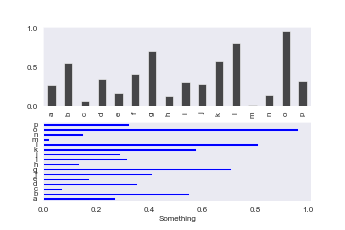

Text(0.5, 0, 'Something')

In [47]:
fig, axes = plt.subplots(2,1)
data.plot.bar(ax=axes[0], color='black', alpha=0.7)
data.plot.barh(ax=axes[1], color='blue')
axes[1].set_xlabel('Something')

Can you produce a bar plot with a DataFrame? What do you think `pandas` will do?



In [ ]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Now look at the documentation of `barh` and create a horizontal, stacked bar plot of the DataFrame



## Box plots



Let's load an example dataset



In [ ]:
tips = sns.load_dataset("tips")
tips

Let's draw a nested boxplot to show bills by day and time



In [ ]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)

Make it prettier!



In [ ]:
sns.despine(offset=10, trim=True)

## Histograms



Histograms plots the frequency of our data discretized in a number of bins



In [ ]:
tips['total_bill'].plot.hist(bins=10)

A related plot is a *density* plot that shows an estimate of the PDF of the data



In [ ]:
tips['total_bill'].plot.density()

Seaborn makes things easier! Let's plot both a histogram and the density estimate of a bimodal distribution



In [ ]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## Scatter plots



Point plots are a useful way of examining the relationship between datasets



In [ ]:
diamonds = sns.load_dataset("diamonds")
diamonds

Let's plot our data with both categorical and numerical semantics



In [ ]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1, 1)
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

`seaborn` also offers a function to plot a scatterplot along with a linear regression line on the data



In [ ]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

-   **Can you set the regression confidence to 68%?**
-   **Now fit a 3rd order polynomial to the data and remove the confidence intervals**



## Facet grids



We can visualize subsets of data grouping them on categorical data



In [ ]:
sns.catplot(x='day',y='tip',hue='sex',col='time',data=tips,kind='bar')

We can also be a bit more complicated by drawing custom plots on each facet



In [ ]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

## Additional packages



In [ ]:
!conda install bokeh holoviews cartopy geopandas